# SARAS(SKAO)_Threshold_Derivation
### Created by Johan Havenga - 28 April 2022

In [19]:
#Import librarier needed
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


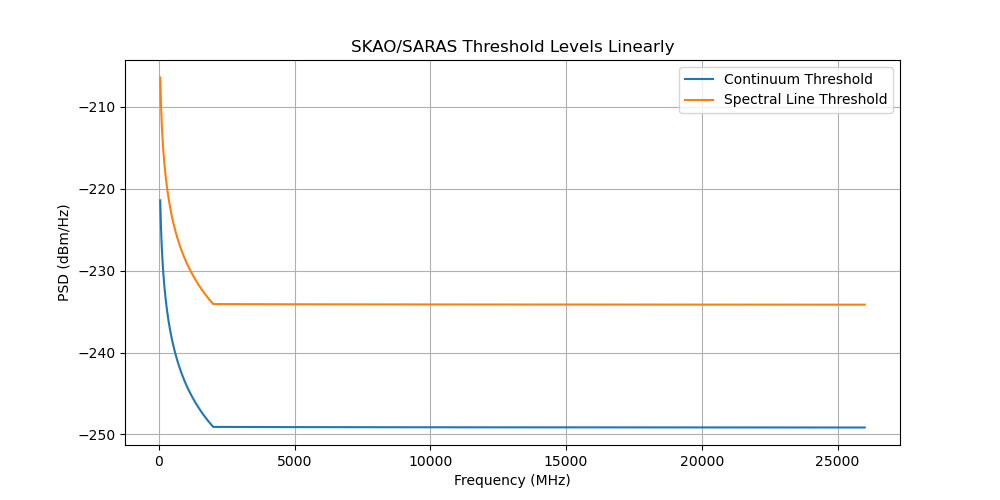

<IPython.core.display.Javascript object>


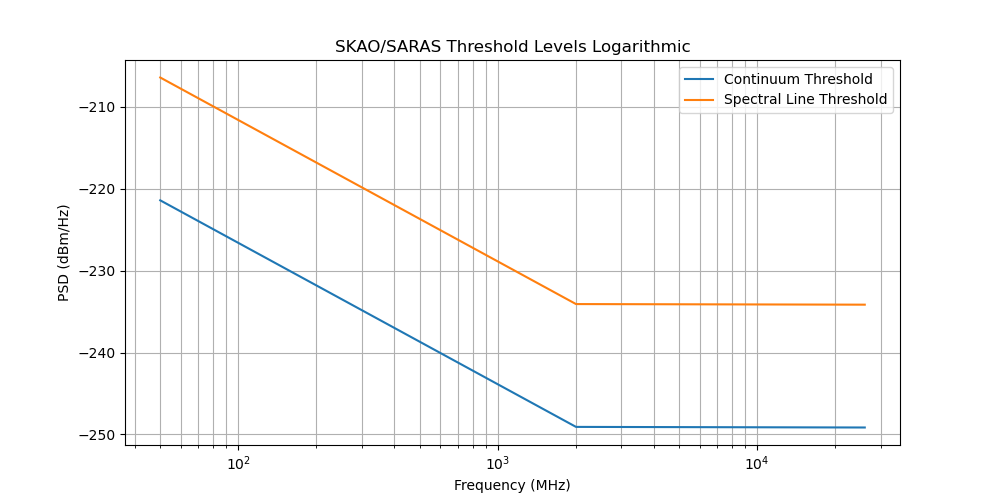

In [20]:
#definition of SARAS according to SKA SA
#Frequency in MHz
freqs = []
freqs_low = np.linspace(50,2000,1000)
freqs_high = np.linspace(2000.01,26000,20000)
freqs.extend(freqs_low)
freqs.extend(freqs_high)
freqs = np.array(freqs)
#print(freqs)
SARAS_continuum = []
SARAS_spectral = []
SARAS_continuum.extend(-17.2708 * np.log10(freqs_low)-192.0714)
SARAS_continuum.extend(-0.065676 * np.log10(freqs_high)-248.8661)
SARAS_spectral.extend(-17.2708 * np.log10(freqs_low)-192.0714+15)
SARAS_spectral.extend(-0.065676 * np.log10(freqs_high)-248.8661+15)

#Plot the thresholds linearly
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Linearly")
plt.plot(freqs,SARAS_continuum, label="Continuum Threshold")
plt.plot(freqs,SARAS_spectral, label="Spectral Line Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("PSD (dBm/Hz)")
plt.grid(which="both")
plt.legend()
plt.show()

#Plot the thresholds semilog
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Logarithmic")
plt.semilogx(freqs,SARAS_continuum, label="Continuum Threshold")
plt.semilogx(freqs,SARAS_spectral, label="Spectral Line Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("PSD (dBm/Hz)")
plt.grid(which="both")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


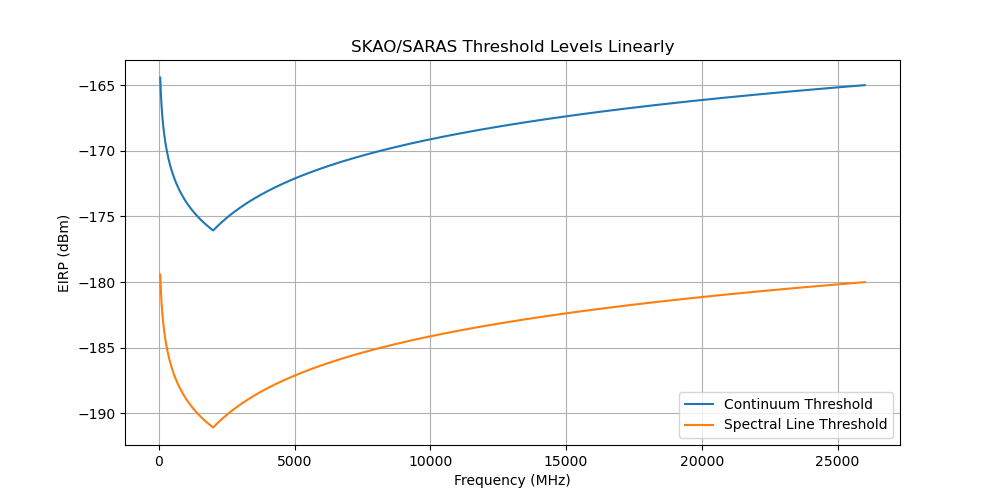

<IPython.core.display.Javascript object>


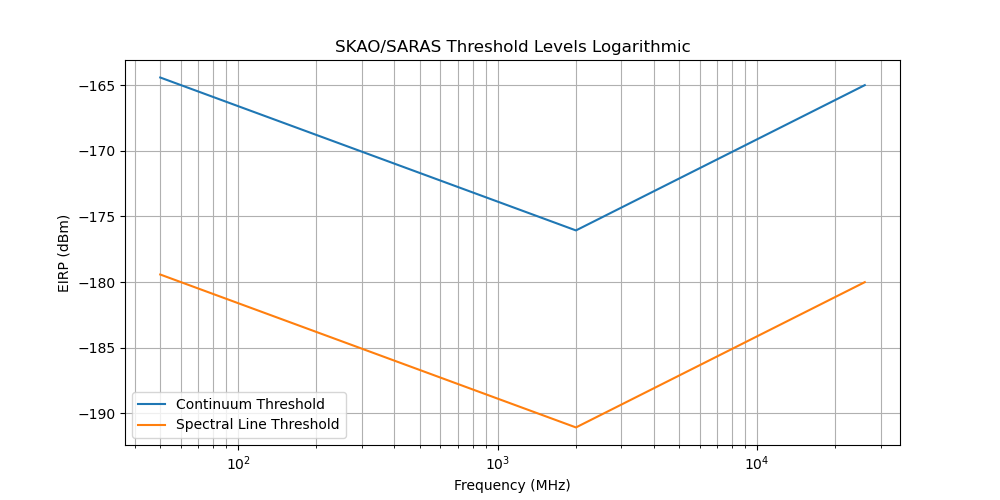

In [21]:
#Threshold levels in power (Effective Isotropic Radiated Power [EIRP] is assumed)
#Using RBW of 1% of observing frequncy for Continuum and 0.01% for Spectral Line Threshold
#dBm/Hz -> dBm
RBW_cont = 1/100*1e6*freqs
RBW_spec = 0.001/100*1e6*freqs
P_SARAS_continuum = SARAS_continuum + 10*np.log10(RBW_cont)
P_SARAS_spectral = SARAS_spectral + 10*np.log10(RBW_spec)

#Plot the thresholds linearly
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Linearly")
plt.plot(freqs,P_SARAS_continuum, label="Continuum Threshold")
plt.plot(freqs,P_SARAS_spectral, label="Spectral Line Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("EIRP (dBm)")
plt.grid(which="both")
plt.legend()
plt.show()

#Plot the thresholds semilog
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Logarithmic")
plt.semilogx(freqs,P_SARAS_continuum, label="Continuum Threshold")
plt.semilogx(freqs,P_SARAS_spectral, label="Spectral Line Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("EIRP (dBm)")
plt.grid(which="both")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


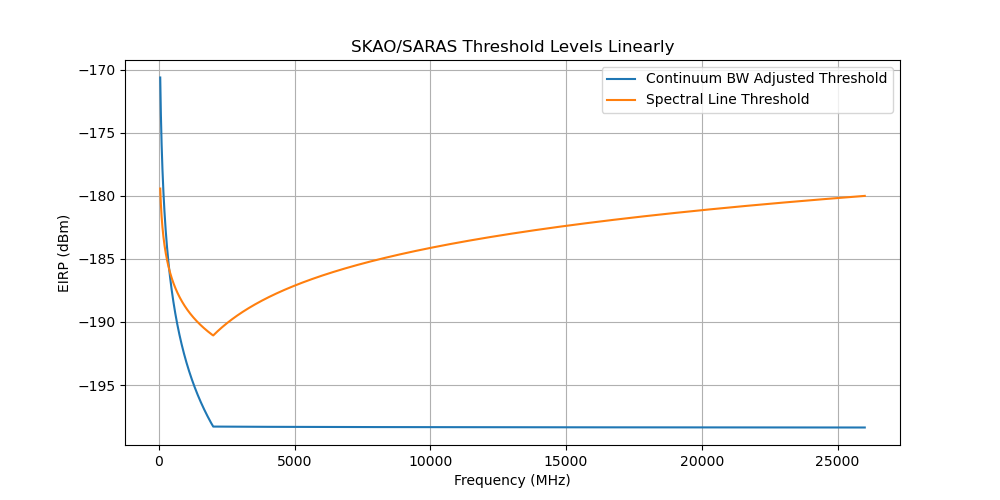

<IPython.core.display.Javascript object>


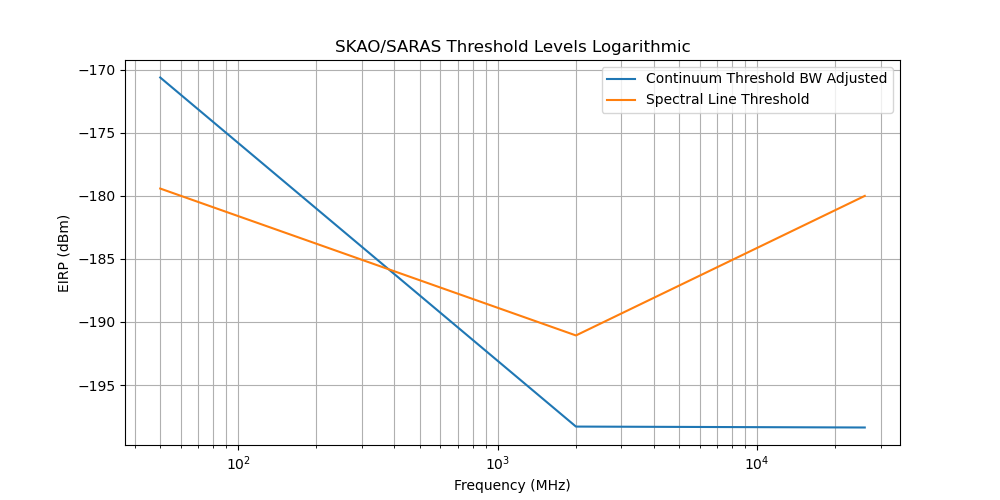

In [22]:
#Correct for the measurement RBW as stipulated in SKA-TEL-SKO-0001796-01
#Gets applied to only the Contimuun Threshold
#Assume a measurement RBW of 100 kHz for this example
MRBW = 120e3
BWCOMP = 10*np.log10(MRBW/(1/100*1e6*freqs))
P_SARAS_continuum_adj = P_SARAS_continuum + BWCOMP
#Plot the thresholds linearly
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Linearly")
plt.plot(freqs,P_SARAS_continuum_adj, label="Continuum BW Adjusted Threshold")
plt.plot(freqs,P_SARAS_spectral, label="Spectral Line Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("EIRP (dBm)")
plt.grid(which="both")
plt.legend()
plt.show()

#Plot the thresholds semilog
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Logarithmic")
plt.semilogx(freqs,P_SARAS_continuum_adj, label="Continuum Threshold BW Adjusted")
plt.semilogx(freqs,P_SARAS_spectral, label="Spectral Line Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("EIRP (dBm)")
plt.grid(which="both")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


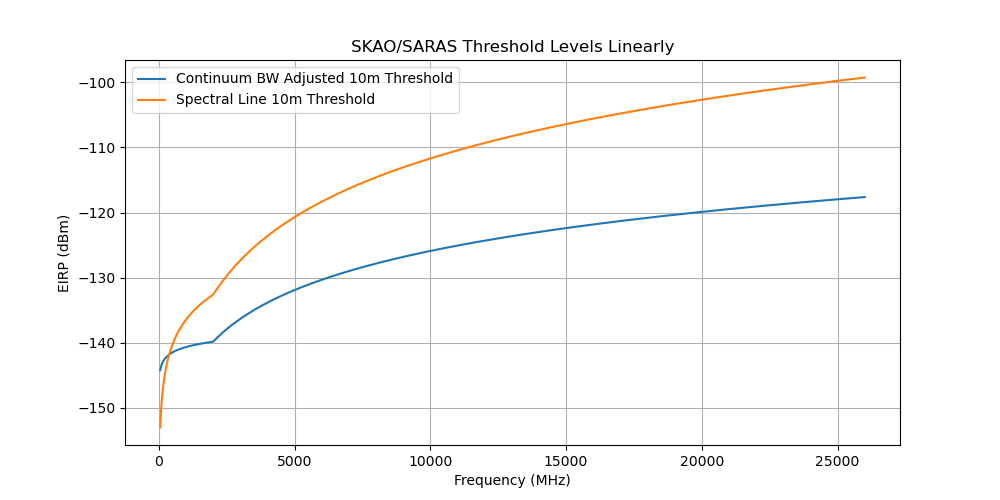

<IPython.core.display.Javascript object>


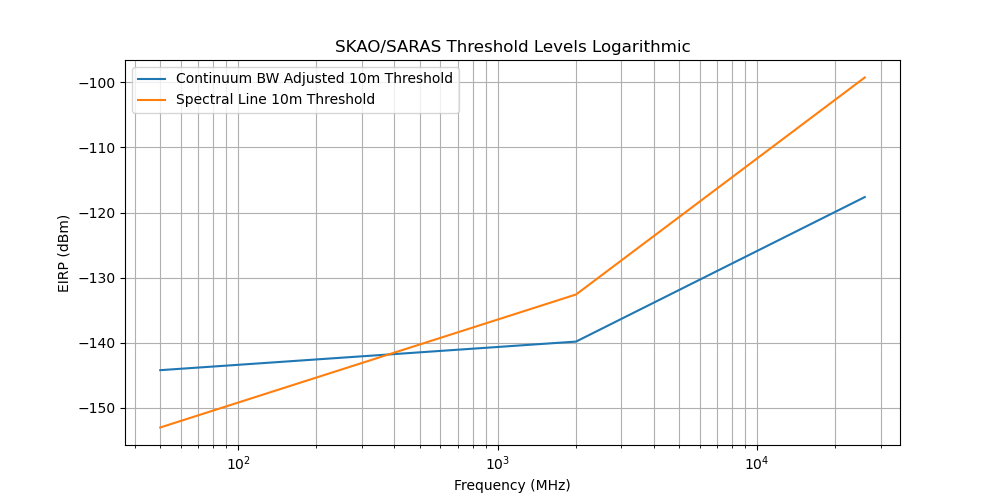

In [23]:
#When validating DUT against thresholds it is done against a distance D that DUT will be used away from radio telescope
#For a DUT used at a distance of 10 m away we caluclate the Friis-based free space loss at 10 and apply it to the thesholds
#freqs[np.where(np.logical_and((freqs > 999.0), (freqs < 1001.0)))]
D = 10
eps0 = 8.854E-12
mu0 = 4*np.pi*1E-7
c0 = 1./np.sqrt(eps0 * mu0)
#print(c0)
FSPL = 20*np.log10((4.0*np.pi*D*freqs*1e6)/c0)
#print(FSPL[np.where(np.logical_and((freqs > 999.0), (freqs < 1001.0)))])
P_SARAS_continuum_adj = P_SARAS_continuum_adj + FSPL
P_SARAS_spectral = P_SARAS_spectral + FSPL
#Plot the thresholds linearly
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Linearly")
plt.plot(freqs,P_SARAS_continuum_adj, label="Continuum BW Adjusted "+str(D)+"m Threshold")
plt.plot(freqs,P_SARAS_spectral, label="Spectral Line "+str(D)+"m Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("EIRP (dBm)")
plt.grid(which="both")
plt.legend()
plt.show()

#Plot the thresholds semilog
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Logarithmic")
plt.semilogx(freqs,P_SARAS_continuum_adj, label="Continuum BW Adjusted "+str(D)+"m Threshold")
plt.semilogx(freqs,P_SARAS_spectral, label="Spectral Line "+str(D)+"m Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("EIRP (dBm)")
plt.grid(which="both")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


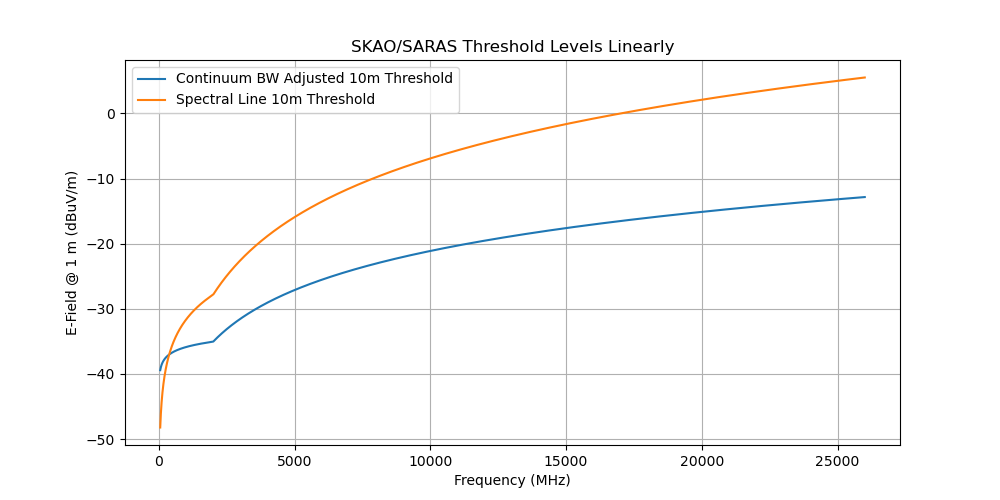

<IPython.core.display.Javascript object>


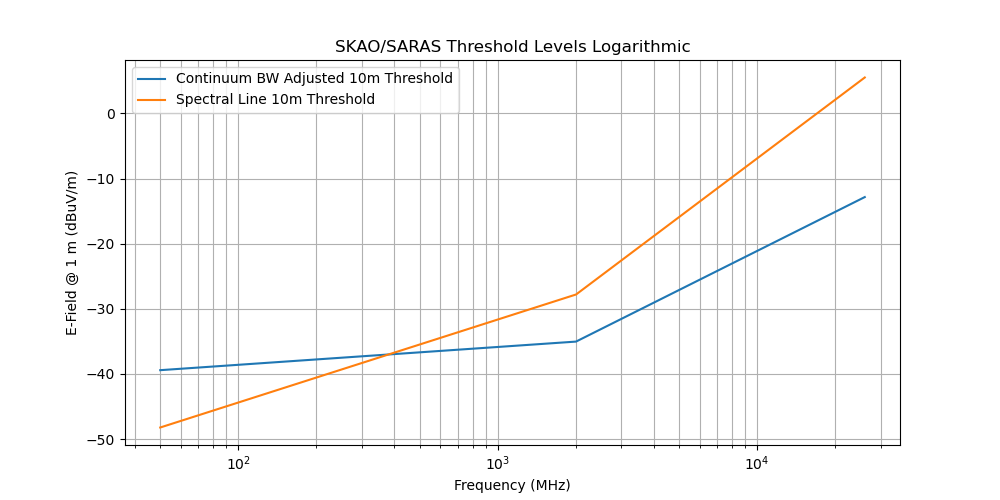

In [24]:
#Some DUT measurements are done in an OATS or anechoic chamber where the device E-Field is measured with the antenna a distance R away from the DUT.
#The threshold levels can also be displayed in E-Field at a measured distance R.
#Assume R to be 1 m for this example
R = 1
Zo = np.sqrt(mu0/eps0)
Cfact = 10*np.log10(Zo/(4*(np.pi)*(R**2))) + 90
EField_spectral = P_SARAS_spectral + Cfact
EField_continuum_bw_adj = P_SARAS_continuum_adj + Cfact
#Plot the thresholds linearly
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Linearly")
plt.plot(freqs,EField_continuum_bw_adj, label="Continuum BW Adjusted "+str(D)+"m Threshold")
plt.plot(freqs,EField_spectral, label="Spectral Line "+str(D)+"m Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("E-Field @ "+str(R)+" m (dBuV/m)")
plt.grid(which="both")
plt.legend()
plt.show()

#Plot the thresholds semilog
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Logarithmic")
plt.semilogx(freqs,EField_continuum_bw_adj, label="Continuum BW Adjusted "+str(D)+"m Threshold")
plt.semilogx(freqs,EField_spectral, label="Spectral Line "+str(D)+"m Threshold")
plt.xlabel("Frequency (MHz)")
plt.ylabel("E-Field @ "+str(R)+" m (dBuV/m)")
plt.grid(which="both")
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


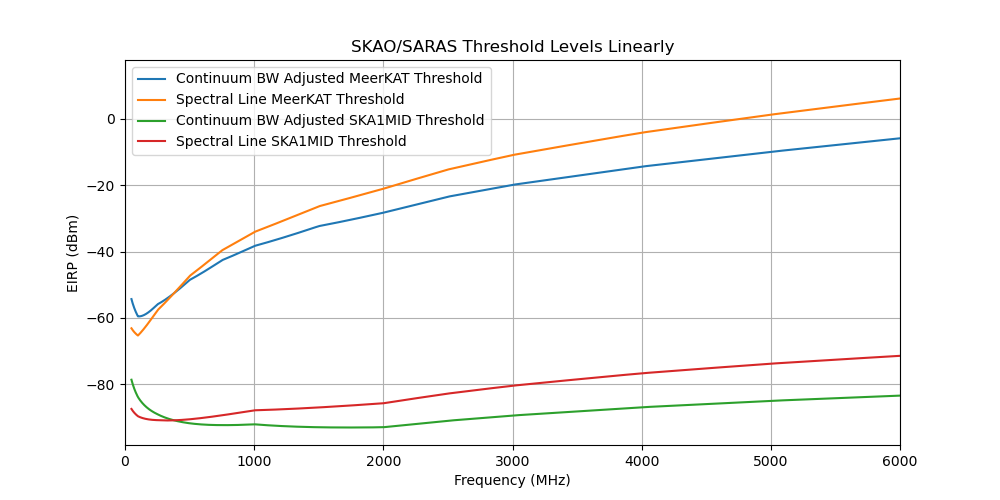

In [37]:
# Written by Annie Polish in June 2022
# Rather than FSPL, use the calculated attenuation levels from SSA-0008J-108

# This section is copied from above cells

#definition of SARAS according to SKA SA
#Frequency in MHz
lim_freqs = []
lim_freqs_low = np.linspace(50,2000,1000)
lim_freqs_high = np.linspace(2000.01,26000,20000)
lim_freqs.extend(lim_freqs_low)
lim_freqs.extend(lim_freqs_high)
lim_freqs = np.array(lim_freqs)
#print(freqs)
SARAS_continuum = []
SARAS_spectral = []
SARAS_continuum.extend(-17.2708 * np.log10(lim_freqs_low)-192.0714)
SARAS_continuum.extend(-0.065676 * np.log10(lim_freqs_high)-248.8661)
SARAS_spectral.extend(-17.2708 * np.log10(lim_freqs_low)-192.0714+15)
SARAS_spectral.extend(-0.065676 * np.log10(lim_freqs_high)-248.8661+15)

#Threshold levels in power (Effective Isotropic Radiated Power [EIRP] is assumed)
#Using RBW of 1% of observing frequncy for Continuum and 0.01% for Spectral Line Threshold
#dBm/Hz -> dBm
RBW_cont = 1/100*1e6*lim_freqs
RBW_spec = 0.001/100*1e6*lim_freqs
P_SARAS_continuum = SARAS_continuum + 10*np.log10(RBW_cont)
P_SARAS_spectral = SARAS_spectral + 10*np.log10(RBW_spec)

#Correct for the measurement RBW as stipulated in SKA-TEL-SKO-0001796-01
#Gets applied to only the Contimuun Threshold
#Assume a measurement RBW of 100 kHz for this example
MRBW = 120e3
BWCOMP = 10*np.log10(MRBW/(1/100*1e6*lim_freqs))
P_SARAS_continuum_adj = P_SARAS_continuum + BWCOMP

# End copied section


atten_freqs = [100,250,500,750,1000,1500,2000,2500,3000,4000,5000,6000]
meerkat_atten = [116.3187284,126.7817372,139.3422436,148.3331573,154.7774273,163.8111724,170.0180693,174.8434897,178.4210265,183.9201717,188.3852762,192.4739323]
# calculate the ska1mid attenuation values (because the ones in the google drive CSV are wrong)
meerkat_corrected = [-50.27213914,-42.72161555,-32.34334568,-24.61946597,-19.09393328,-11.34738115,-6.054459564,-0.5336836255,3.738510865,10.62697168,16.19856726,21.03890852]
meerkat_orig = np.array(meerkat_corrected) - np.array(meerkat_atten)
ska1mid_corrected = [-74.57549103,-75.78308364,-75.51924784,-74.30021253,-72.80836537,-71.95169876,-70.70055304,-68.04613432,-65.7719174,-61.88217428,-58.83402995,-56.5047593]
ska1mid_atten = np.array(ska1mid_corrected)-meerkat_orig

meerkat_atten = np.interp(lim_freqs, atten_freqs, meerkat_atten)
ska1mid_atten = np.interp(lim_freqs, atten_freqs, ska1mid_atten)

#print(FSPL[np.where(np.logical_and((freqs > 999.0), (freqs < 1001.0)))])
meerkat_SARAS_continuum_adj = P_SARAS_continuum_adj + meerkat_atten
meerkat_SARAS_spectral = P_SARAS_spectral + meerkat_atten
ska1mid_SARAS_continuum_adj = P_SARAS_continuum_adj + ska1mid_atten
ska1mid_SARAS_spectral = P_SARAS_spectral + ska1mid_atten

meerkat_combined = np.minimum(meerkat_SARAS_continuum_adj, meerkat_SARAS_spectral)
ska1mid_combined = np.minimum(ska1mid_SARAS_continuum_adj, ska1mid_SARAS_spectral)

#Plot the thresholds linearly
plt.figure(figsize=(10,5))
plt.title("SKAO/SARAS Threshold Levels Linearly")
plt.plot(freqs,meerkat_SARAS_continuum_adj, label="Continuum BW Adjusted MeerKAT Threshold")
plt.plot(freqs,meerkat_SARAS_spectral, label="Spectral Line MeerKAT Threshold")
plt.plot(freqs,ska1mid_SARAS_continuum_adj, label="Continuum BW Adjusted SKA1MID Threshold")
plt.plot(freqs,ska1mid_SARAS_spectral, label="Spectral Line SKA1MID Threshold")
# plt.plot(lim_freqs,meerkat_combined, label="Threshold imposed by MeerKAT")
# plt.plot(lim_freqs,ska1mid_combined, label="Threshold imposed by SKA1MID")
plt.xlabel("Frequency (MHz)")
plt.ylabel("EIRP (dBm)")
plt.xlim(0, 6000)
plt.grid(which="both")
plt.legend()
plt.show()